In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests
import os
import seaborn as sns

Gathering


1.Read the downloaded twitter-archive file

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2.Download the image-predictions file

In [3]:
folder_name = 'image-predictions'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
if not os.path.isfile(folder_name):
    with open(folder_name, 'wb') as file:
        file.write(response.content)

In [5]:
img_df = pd.read_csv('image-predictions', sep = "\t")

3.Receiving data from Twitter API 

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
df_list = []
with open('tweet-json.txt') as file:
     for line in file:
         df_list.append(json.loads(line))

In [7]:
tweet_df = pd.DataFrame(df_list, columns= ['id', 'retweet_count', 'favorite_count'])

In [8]:
tweet_df = tweet_df.rename(columns= {'id':'tweet_id'})

In [9]:
tweet_df.to_csv('tweet_df.csv', index= False)

Assessing

Tideness Issues :

0) {tweet_df} dataframe is in text form and not distributed as columns and rows. (ALREADY DONE while gathering)
1) {archive_df} dog types are classified into 4 columns (doggo, floofer, pupper, puppo) instead of one.
2) {img_df}  (p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) columns are not necessary, can be removed as first prediction 1 is enough and most accurate.
3) The dataframe comes from 3 different sources and need to be merged

Quality issues :

1) (in_reply_to_status_id', 'in_reply_to_user_id, retweeted_status_id,  retweeted_status_user_id , retweeted_status_timestamp) not required data as replies and retweets are irrelevant[VALIDITY ISSUE]

2) img_df has 281 rows less than archive_df which indicates 281 images are missing. (2075 vs  2356) [VALIDITY ISSUE]

3) Some dogs' names are missing (None). [COMPLETENESS ISSUE]
3') Some dogs' names are english words (a, an, the) instead of names. [ACCURACY ISSUE]

4) tweet id column datatype is integer instead of object time stamp column datatype is object instead of datetime. [ACCURACY ISSUE]

5)tweet id column datatype is integer instead of object. [ACCURACY ISSUE]

6) Some rating_denominators are numbers other than 10. [CONSISTENCY ISSUE]

7) some names are in lowercase in p1 column. [ACCURACY ISSUE]

8) (p1, p1_conf, p1_dog) columns are not indicative. [VALIDITY ISSUE]

9) favorite counts column have some 0 values. [COMPLETENESS ISSUE]

10) tweet_df has 2 rows less than archive_df. (2354 vs 2356) [COMPLETENESS ISSUE].

11) (favorite_count, retweet_count)columns have 0 value in minimum count. [ACCURACY ISSUE]

12) Missing values are written in 2 formats NAN and None. [CONSISTENCY ISSUE]

Archive dataframe programmatic and visual assessment

In [10]:
archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
255,844223788422217728,NaN,NaN,2017-03-21 16:26:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Margo. She just dug pup a massive hole...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844223788...,12,10,Margo,None,None,None,None
1518,690932576555528194,NaN,NaN,2016-01-23 16:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's testing out the water. Suc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690932576...,12,10,Buddy,None,None,None,None
472,816450570814898180,NaN,NaN,2017-01-04 01:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moose. He doesn't want his friend to go b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,None,None,None,None
1383,700847567345688576,NaN,NaN,2016-02-20 01:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Crouton. He's a Galapagos Boonwiddle. Has...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700847567...,10,10,Crouton,None,None,None,None
2291,667165590075940865,NaN,NaN,2015-11-19 02:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667165590...,10,10,Churlie,None,None,None,None
1167,721503162398597120,NaN,NaN,2016-04-17 00:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Panda. He's happy af. 11/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/721503162...,11,10,Panda,None,None,None,None
394,825829644528148480,NaN,NaN,2017-01-29 22:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,None,None,None,None
89,875021211251597312,NaN,NaN,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211...,12,10,None,None,None,None,None
832,768596291618299904,NaN,NaN,2016-08-24 23:50:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oakley and Charlie. They're convi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768596291...,12,10,Oakley,None,None,None,None


In [11]:
archive_df.shape

(2356, 17)

In [12]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
archive_df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [14]:
archive_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [15]:
sum(archive_df.duplicated())

0

Image dataframe programmatic and visual assessment

In [16]:
img_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,2.115360e-03,False
1497,783466772167098368,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,True,miniature_pinscher,0.115916,True,toy_terrier,3.629390e-02,True
943,704347321748819968,https://pbs.twimg.com/media/CcZYJniXEAAEJRF.jpg,1,teddy,0.233378,False,feather_boa,0.088474,False,Brittany_spaniel,8.291730e-02,True
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,0.271485,False,gar,1.899450e-01,False
1525,788412144018661376,https://pbs.twimg.com/media/CvEAqQoWgAADj5K.jpg,1,golden_retriever,0.805238,True,Labrador_retriever,0.113798,True,Brittany_spaniel,3.855870e-02,True
149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False
1711,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,swing,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,3.046190e-05,False
272,670826280409919488,https://pbs.twimg.com/media/CU9A8ZuWsAAt_S1.jpg,1,scorpion,0.927956,False,tarantula,0.021631,False,wolf_spider,1.483750e-02,False
632,680959110691590145,https://pbs.twimg.com/media/CXNAsm6WsAEST9R.jpg,2,carousel,0.500992,False,feather_boa,0.064390,False,pug,4.435650e-02,True
738,687124485711986689,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,car_mirror,0.997121,False,seat_belt,0.000375,False,beagle,2.162060e-04,True


In [17]:
img_df.shape

(2075, 12)

In [18]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
img_df.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [20]:
img_df.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [21]:
sum(img_df.duplicated())

0

tweet dataframe programmatic and visual assessment

In [22]:
tweet_df.sample(10)

,tweet_id,retweet_count,favorite_count
468,816829038950027264,5496,0
2078,670823764196741120,205,824
652,792050063153438720,2088,8029
1946,673697980713705472,2165,4067
1926,674045139690631169,710,1520
576,800855607700029440,1889,0
93,874012996292530176,11007,35501
1448,695816827381944320,1320,3287
1989,672622327801233409,542,1377
23,887343217045368832,10737,34222


In [23]:
tweet_df.shape

(2354, 3)

In [24]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
tweet_df.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [26]:
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [27]:
sum(tweet_df.duplicated())

0

Cleaning

In [10]:
archive_df_clean = archive_df.copy()
img_df_clean = img_df.copy()
tweet_df_clean = tweet_df.copy()

DEFINE
CODE
TEST

Tideness Issues Cleaning

1) Merge all dog types columns (doggo|floofer|pupper|puppo)into one(dog_type) in archive dataframe

In [11]:
archive_df_clean['dog_type'] = archive_df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [12]:
archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis='columns', inplace=True)

In [31]:
archive_df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
392,826115272272650244,NaN,NaN,2017-01-30 17:10:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ike. He's demonstrating the pupmost re...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826115272...,13,10,Ike,NaN
354,831262627380748289,NaN,NaN,2017-02-13 22:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's feeling h*ckin festive an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831262627...,12,10,Tucker,NaN
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,NaN
800,772615324260794368,NaN,NaN,2016-09-05 02:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Gromit. He's pupset bec...,7.652221e+17,4.196984e+09,2016-08-15 16:22:20 +0000,https://twitter.com/dog_rates/status/765222098...,10,10,Gromit,NaN
1720,680145970311643136,NaN,NaN,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,pupper


2) Remove predictions 2 and 3 columns ('p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog') in image dataframe

In [13]:
img_df_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis='columns', inplace=True)

In [14]:
img_df_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
1073,716802964044845056,https://pbs.twimg.com/media/CfKYfeBXIAAopp2.jpg,2,malinois,0.619577,True
964,706166467411222528,https://pbs.twimg.com/media/CczOp_OWoAAo5zR.jpg,1,Samoyed,0.430418,True
1910,853299958564483072,https://pbs.twimg.com/media/C9eHyF7XgAAOxPM.jpg,1,grille,0.652280,False
1289,751251247299190784,https://pbs.twimg.com/ext_tw_video_thumb/75125...,1,Walker_hound,0.178852,True
385,673345638550134785,https://pbs.twimg.com/media/CVg0SVRWEAAsBrS.jpg,1,hamster,0.761025,False


3) Merge all 3 dataframes into one according to tweet id

In [15]:
clean_df = pd.merge(archive_df_clean, tweet_df_clean, on= 'tweet_id', how= 'left')

In [16]:
clean_df = pd.merge(clean_df, img_df_clean, on= 'tweet_id', how= 'left')

In [36]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_type                    399 n

Quality Issues Cleaning

0) {tweet_df} dataframe is in text form and not distributed as columns and rows. (ALREADY DONE while gathering)

1) remove replies and retweets columns (in_reply_to_status_id', 'in_reply_to_user_id, retweeted_status_id,  retweeted_status_user_id , retweeted_status_timestamp) using drop method

In [17]:
clean_df = clean_df[clean_df.retweeted_status_id.isnull()]

In [18]:
clean_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis='columns', inplace=True)

In [19]:
clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis='columns', inplace=True)

In [40]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   int64  
 7   name                2175 non-null   object 
 8   dog_type            364 non-null    object 
 9   retweet_count       2175 non-null   float64
 10  favorite_count      2175 non-null   float64
 11  jpg_url             1994 non-null   object 
 12  img_num             1994 non-null   float64
 13  p1                  1994 non-null   object 
 14  p1_conf             1994 non-null   float64
 15  p1_dog              1994 non-null   object 
dtypes: flo

2) remove rows that Have no images using notnull

In [20]:
clean_df = clean_df[clean_df.jpg_url.notnull()]

In [42]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   dog_type            326 non-null    object 
 9   retweet_count       1994 non-null   float64
 10  favorite_count      1994 non-null   float64
 11  jpg_url             1994 non-null   object 
 12  img_num             1994 non-null   float64
 13  p1                  1994 non-null   object 
 14  p1_conf             1994 non-null   float64
 15  p1_dog              1994 non-null   object 
dtypes: flo

In [43]:
clean_df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog
1917,674291837063053312,2015-12-08 18:17:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenny. He just wants to be included in...,https://twitter.com/dog_rates/status/674291837...,11,10,Kenny,NaN,6533.0,15817.0,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1.0,Cardigan,0.611525,True
1450,695816827381944320,2016-02-06 03:50:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a dog enjoying a sunset. 11/10 would tr...,https://twitter.com/dog_rates/status/695816827...,11,10,None,NaN,1320.0,3287.0,https://pbs.twimg.com/media/CagJtjYW8AADoHu.jpg,1.0,Pomeranian,0.382234,True
1991,672622327801233409,2015-12-04 03:43:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This lil pupper is sad because we haven't foun...,https://twitter.com/dog_rates/status/672622327...,12,10,None,pupper,542.0,1377.0,https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg,1.0,golden_retriever,0.952773,True
2287,667177989038297088,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,https://twitter.com/dog_rates/status/667177989...,8,10,a,NaN,58.0,200.0,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1.0,vizsla,0.259249,True
1594,686377065986265092,2016-01-11 02:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Birf. He thinks he's gone blind. 10/10 ve...,https://twitter.com/dog_rates/status/686377065...,10,10,Birf,pupper,637.0,2433.0,https://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg,1.0,German_shepherd,0.830816,True
361,829501995190984704,2017-02-09 01:27:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He was a skater pup. She said see...,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,NaN,12224.0,34913.0,https://pbs.twimg.com/media/C4L7p19W8AA3Fs_.jpg,1.0,French_bulldog,0.950851,True
1720,680145970311643136,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,pupper,1972.0,3955.0,https://pbs.twimg.com/media/CXBdJxLUsAAWql2.jpg,1.0,miniature_poodle,0.457117,True
1113,733109485275860992,2016-05-19 01:38:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,17621.0,44619.0,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1.0,golden_retriever,0.945523,True
1293,708026248782585858,2016-03-10 20:26:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and watch thi...,https://twitter.com/dog_rates/status/708026248...,13,10,None,NaN,2166.0,4799.0,https://pbs.twimg.com/ext_tw_video_thumb/70802...,1.0,malinois,0.786468,True
1205,715928423106027520,2016-04-01 15:46:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He's a Yorkshire Piccolope. 1...,https://twitter.com/dog_rates/status/715928423...,11,10,Bubbles,NaN,987.0,3485.0,https://pbs.twimg.com/media/Ce99GhLW8AAHG38.jpg,1.0,pug,0.976685,True


3) Correct dog names instead of (a, an, the)
also, find some missing dog names.

In [21]:
clean_df.name = clean_df.name.replace(regex=['^[a-z]+','None'], value=np.nan)

In [22]:
sum(clean_df.name.isnull())

644

In [23]:
def function(text):
    text_list = text.split()
    for word in text_list:
        if word.lower() == 'named':
            name_index = text_list.index(word) + 1
            return text_list[name_index]
        else:
            pass
    return np.nan

In [24]:
clean_df.name = np.where(clean_df.name.isnull(), clean_df.text.apply(function), clean_df.name)

In [25]:
sum(clean_df.name.isnull())

621

Not all names are corrected but better than before

4) correct tweet id column datatype to object instead of integer.

In [26]:
clean_df.tweet_id = clean_df.tweet_id.astype(str)

5) correct time stamp column datatype to  datetime instead of object.

In [27]:
clean_df.timestamp = pd.to_datetime(clean_df.timestamp)

In [51]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1373 non-null   object             
 8   dog_type            326 non-null    object             
 9   retweet_count       1994 non-null   float64            
 10  favorite_count      1994 non-null   float64            
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

6) correct all rating_denominator values to 10

In [28]:
clean_df.loc[:, 'rating_denominator'] = '10'

In [29]:
clean_df.rating_denominator =clean_df.rating_denominator.astype(int)

In [54]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int32              
 7   name                1373 non-null   object             
 8   dog_type            326 non-null    object             
 9   retweet_count       1994 non-null   float64            
 10  favorite_count      1994 non-null   float64            
 11  jpg_url             1994 non-null   object             
 12  img_num             1994 non-null 

7) correct p1 predictions to be uppercase.

In [30]:
clean_df['p1'] = clean_df['p1'].str.capitalize()

8)rename (p1, p1_conf, p1_dog) columns names to more indicative names.

In [31]:
clean_df.rename(columns={'p1':'prediction', 'p1_conf':'prediction_accuracy', 'p1_dog':'is_prediction_a_dog'})

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,jpg_url,img_num,prediction,prediction_accuracy,is_prediction_a_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853.0,39467.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514.0,33819.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328.0,25461.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964.0,42908.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774.0,41048.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,41.0,111.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,Miniature_pinscher,0.560311,True
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,147.0,311.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,47.0,128.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,48.0,132.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,Redbone,0.506826,True


9) fill the 0 values in favorite_count column with the average of all values. 

In [32]:
clean_df['favorite_count'].fillna((clean_df['favorite_count'].mean()), inplace=True)

10) tweet_df has 2 rows less than archive_df
(Fixed During other cleaning steps)

11) write missing values in one form (NaN) instead of (None, NaN)(Fixed During other cleaning steps)

12) (favorite_count, retweet_count)columns have 0 value in minimum count.(Fixed During other cleaning steps)

In [33]:
clean_df.favorite_count.describe()

count      1994.000000
mean       8895.725677
std       12213.193181
min          81.000000
25%        1982.000000
50%        4136.000000
75%       11308.000000
max      132810.000000
Name: favorite_count, dtype: float64

In [34]:
clean_df.retweet_count.describe()

count     1994.000000
mean      2766.753260
std       4674.698447
min         16.000000
25%        624.750000
50%       1359.500000
75%       3220.000000
max      79515.000000
Name: retweet_count, dtype: float64

STORING DATA

In [35]:
clean_df.to_csv('twitter_archive_master.csv')

DATA ANALYSIS AND VISUALIZATION

Dog Types

In [36]:
clean_df.dog_type.value_counts()

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_type, dtype: int64

In [37]:
dog_type_df = clean_df.dog_type.value_counts()

Text(0.5, 1.0, 'Percentage of different dog types')

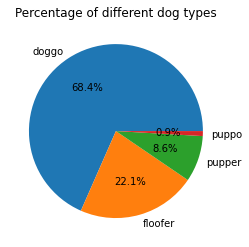

In [38]:
plt.pie(dog_type_df, labels=['doggo', 'floofer', 'pupper', 'puppo'], autopct='%1.1f%%')
plt.title('Percentage of different dog types')


Insights
doggo has the highest percentage with value of 68.4%
puppo has the lowest percentage with value of 0.9%

Favorite count VS Retweet count

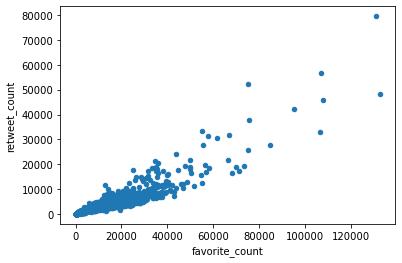

In [39]:
clean_df.plot(x='favorite_count', y='retweet_count', kind='scatter');

Insights
Favorite count and Retweet count have Direct relationship

Dogs' Predictions

In [40]:
prediction_df = clean_df.p1_dog.value_counts()

In [41]:
clean_df.p1_dog.value_counts()

True     1477
False     517
Name: p1_dog, dtype: int64

Text(0.5, 1.0, 'Percentage of images with dogs vs images without')

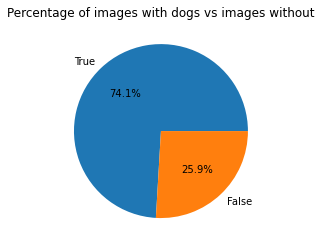

In [42]:
plt.pie(prediction_df, labels=['True', 'False'], autopct='%1.1f%%')
plt.title('Percentage of images with dogs vs images without')

Insights
74.1% of the images contain dogs

In [50]:
ratings_df = clean_df.rating_numerator.value_counts()

C:\aliaa\programming\programs\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Ratings Frequency'),
 Text(0.5, 0, 'Ratings'),
 Text(0, 0.5, 'Frequency')]

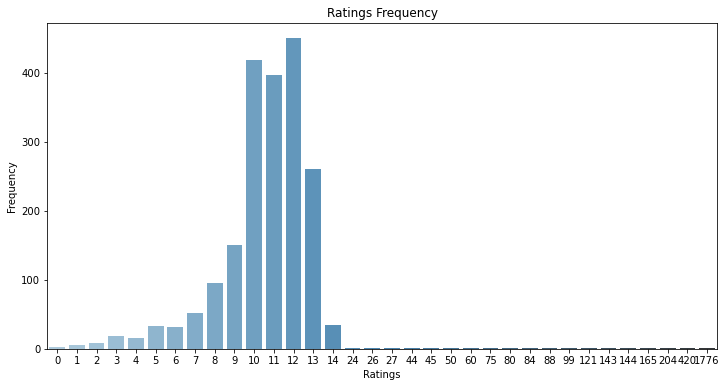

In [53]:
x = ratings_df.index
y = ratings_df.values
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x,y,palette='Blues_d', ax=ax)
ax.set(title='Ratings Frequency', xlabel='Ratings', ylabel='Frequency')

Insights
Most frequency are in ratings of range(8:13)

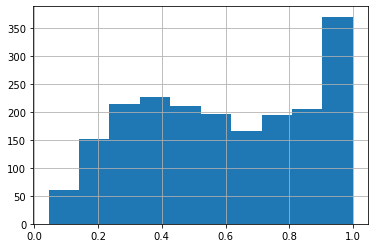

In [56]:
clean_df['p1_conf'].hist();

Insights
Predictions Accuracy Histogram is left-skewed